<center><a target="_blank" href="https://academy.constructor.org/"><img src=https://lh3.googleusercontent.com/d/1EmH3Jks5CpJy0zK3JbkvJZkeqWtVcxhB width="800" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center> <h1> Calculus </h1> </center>

<p style="margin-bottom:1cm;"></p>

_____

<center>Constructor Academy, 2024</center>

<center><a target="_blank" ><img src="https://www.bytebase.com/_next/image/?url=%2Fcontent%2Fblog%2Funderstanding-google-cloud-sql-pricing%2Fcover.webp&w=1080&q=75" width="700" style="background:none; border:none; box-shadow:none;" /></a> </center>

This notebook walks you through the derivation of some important rules for computing partial derivatives with respect to vectors, particularly those useful for training neural networks.

### Contents

1. Neural Network Intuition
2. Scalar Derivative Rules
    1. Derivatives in Python
    2. Deriving the Sigmoid Function
    3. Exercise: Deriving the tanh Function
3. Vector Calculus and Partial Derivatives
    1. Partial Derivatives
    2. The Gradient
    3. Real-World Application: The Gradient Descent Algorithm
4. The Jacobian Matrix
5. The Chain Rules
    1. Single-Variable Chain Rule
    2. Single-Variable Total Derivative Chain Rule
    3. Vector Chain Rule

### 1. Neural Network Intuition

As mentioned above, multivariate calculus is the basis of all deep learning algorithms. Thus, it is useful to have an intuition of how neural networks work in order to relate theory with practice.

This video conveys the rough ideas behind neural networks with a real world example: https://www.youtube.com/watch?v=aircAruvnKk&t=4s.  

If you are overwhelmed by the amount of information in these 15 minutes, don't worry. These concepts will be covered in-depth during the course. The idea is only to get your feet wet and make it possible for you to understand why the following mathematical concepts are fundamental. This knowledge will come in handy when reading papers, which is key to keep up-to-date in this fast-moving field.

### 2. Scalar Derivative Rules

In the table below, there is a quick review of the most important derivative rules for single variable calculus relevant to the content of this notebook.   

If you are a bit shaky on these concepts, feel free to watch the series from Khan Academy to jog your memory: https://www.khanacademy.org/math/old-ap-calculus-ab/ab-derivative-rules.

*Remark: Do not spend too much time on revising calculus that is not closely related to the topics that are presented in this notebook. Make sure to focus most of your attention on the presented content.*

|Rule|f(x)|Derivative notation|Example|
|----|----|----|----|
|**Constant**|$$c$$|$$0$$|\begin{equation}\frac{d}{d x} 99=0\end{equation}|
|**Multiplication by constant**|$$cf$$|\begin{equation}c \frac{d f}{d x}\end{equation}|$$\frac{d}{d x} 3 x=3$$|
|**Power Rule**|$$x^n$$|$$nx^{n-1}$$|$$\frac{d}{d x} x^{3}=3 x^{2}$$|
|**Sum Rule**|$$f+g$$|$$\frac{d f}{d x}+\frac{d g}{d x}$$|$$\frac{d}{d x}\left(x^{2}+3 x\right)=2 x+3$$|
|**Difference Rule**|$$f-g$$|$$\frac{d f}{d x}-\frac{d g}{d x}$$|$$\frac{d}{d x}\left(x^{2}-3 x\right)=2 x-3$$|
|**Product Rule**|$$fg$$|$$f \frac{d g}{d x}+\frac{d f}{d x} g$$|$$\frac{d}{d x} x^{2} x=x^{2}+x 2 x=3 x^{2}$$|
|**Chain Rule**|$$f(g(x))$$|$$\frac{d f(u)}{d u} \frac{d u}{d x}, \text { let } u=g(x)$$|$$\frac{d}{d x} \ln \left(x^{2}\right)=\frac{1}{x^{2}} 2 x=\frac{2}{x}$$|

#### 2.1. Real-World Application: Derivatives with Python

Parameters of the derivative function implemented in SciPy: https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.misc.derivative.html

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### 2.2. Deriving the Sigmoid function

Neural network activation functions are a crucial component of deep learning. Activation functions determine the output of a deep learning model, its accuracy, and also the computational efficiency of training a model — which can make or break a large scale neural network.

One of the most famous activation functions is the sigmoid. It takes a real-valued number and “squashes” it into range between 0 and 1. In particular, large negative numbers become 0 and large positive numbers become 1.

$$
S(x)=\frac{1}{1+e^{-x}}
$$

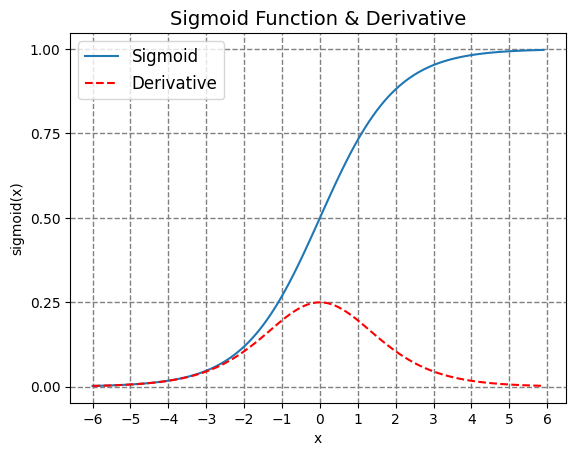

In [3]:
# Define the function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def derivative_sigmoid(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

# Create a NumPy array on which to apply the sigmoid function
x = np.arange(-6, 6, 0.1)

# Apply the sigmoid function
sig_x = sigmoid(x)

# Apply the derivative of the sigmoid function
d_sigmoid = derivative_sigmoid(x)

# Plotting the sigmoid function
plt.plot(x, sig_x, linestyle='-')

# Plotting the derivative
plt.plot(x, d_sigmoid, linestyle='--', color='red')

# Customize Plot
plt.grid(True, lw=1, ls='--', c='.5')
plt.xticks(np.arange(-6, 7, step=1))
plt.yticks(np.arange(0, 1.25, step=0.25))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.legend(labels=['Sigmoid', 'Derivative'], fontsize=12)
plt.title('Sigmoid Function & Derivative', fontdict={'fontsize': 14})
plt.show()

#### 2.3. Exercise: Deriving the tanh function

The tanh function squashes a real-valued number to the range [-1, 1]. It’s non-linear. But unlike the sigmoid function, its output is zero-centered.

$$
\tanh x=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}
$$

Implement the tanh in Python, and visualize the function as well as its derivative. Fill in the missing code (all "None" statements) in the cell below.

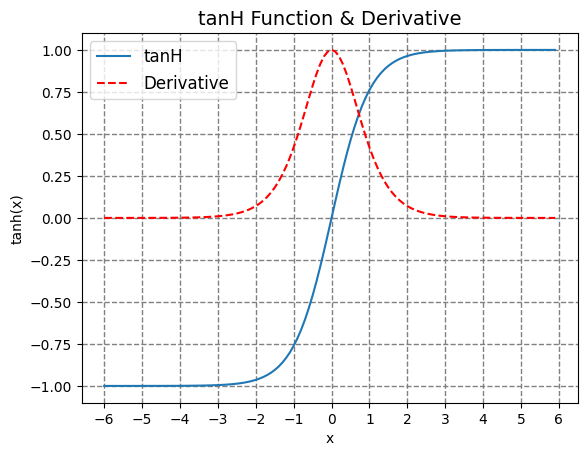

In [9]:
# Define the tanh function
def tanh(x):
    return ((np.exp(x)-np.exp(-x)) / (np.exp(x)+np.exp(-x)))

# Define the derivative of the tanh function
def derivative_tanh(x):
    tanh_x = tanh(x)
    return 1 - tanh_x**2

# Create a NumPy array on which to apply to sigmoid function
x = np.arange(-6,6,0.1)

# Applying the tanh function
tanh_x = tanh(x)

# Plotting the tanh function
plt.plot(x, tanh_x, linestyle = '-')

# Applying the derivative of the tanh function on x
d_tanh = derivative_tanh(x)

# Plotting the derivative
plt.plot(x, d_tanh, linestyle = '--', color = 'red')

# Customize Plot
plt.grid(True, lw = 1, ls = '--', c = '.5')
plt.xticks(np.arange(-6, 7, step=1))
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.legend(labels=['tanH', 'Derivative'], fontsize=12)
plt.title('tanH Function & Derivative', fontdict={'fontsize': 14})
None # do not replace this statement

### 3. Vector Calculus and Partial Derivatives

Neural network layers are not single functions of a single parameter, $f(x)$. So, let's move on to functions of multiple parameters such as $f(x, y)$.

#### 3.1. Partial Derivatives

For example, what is the derivative of $xy$ (i.e., the multiplication of $x$ and $y$)? In other words, how does the product $xy$ change when we wiggle the variables? Well, it depends on whether we are changing $x$ or $y$. We compute derivatives with respect to one variable (parameter) at a time, giving us two different partial derivatives for this two-parameter function (one for $x$ and one for $y$).

The partial derivative with respect to $x$ is just the usual scalar derivative, simply treating any other variable in the equation as a constant.

$$
\textrm{Function: } f(x, y)=3 x^{2} y \\
\textrm{Derivative in respect to x: }\frac{\partial}{\partial x} 3 y x^{2}=3 y \frac{\partial}{\partial x} x^{2}=3 y 2 x=6 y x \\
\textrm{Derivative in respect to x: }\frac{\partial}{\partial y} 3 x^{2} y=3 x^{2} \frac{\partial}{\partial y} y=3 x^{2} \frac{\partial y}{\partial y}=3 x^{2} \times 1=3 x^{2}
$$  

If you need some help, check out this article: https://bit.ly/2iDlDZt

#### 3.2. The Gradient

After learning that functions with a multidimensional input have partial derivatives, you might wonder what the full derivative of such a function is. In the case of scalar-valued multivariable functions, meaning those with a multidimensional input but a one-dimensional output, the answer is the gradient.

The gradient of a function $f$, denoted as $∇f$, is the collection of all its partial derivatives into a vector. Following the example above, the gradient of $f(x, y)=3x^{2}y$ is:

$$
\nabla f(x, y)=\left[\frac{\partial f(x, y)}{\partial x}, \frac{\partial f(x, y)}{\partial y}\right]=\left[6 y x, 3 x^{2}\right]
$$

The (graphical) interpretation of the gradient is a key concept in order to understand the optimization process of neural networks. Take the time to watch this 6 minute long video on why the gradient can be thought of as pointing in the "direction of steepest ascent": https://www.youtube.com/watch?v=_-02ze7tf08

----
*Optional video: relating the way gradients are computed with its interpretation*: https://www.youtube.com/watch?v=TEB2z7ZlRAw

----
#### 3.3. Real World Application: The Gradient Descent Algorithm

Gradient Descent is an optimization algorithm that helps machine learning models converge at a minimum value through repeated steps. Essentially, gradient descent is used to minimize a function by finding the value that gives the lowest output of that function. Often times, this function is a loss function. Loss functions measure how bad our model performs compared to actual occurrences (measuring the difference between your prediction and reality). Hence, it only makes sense that we should reduce this loss. One way to do this is via Gradient Descent.

<u>Steps of the Gradient Descent Algorithm</u>
1. Obtain a function to minimize $f(x)$
2. Initialize a value x from which to start the descent or optimization from
3. Specifiy a learning rate that will determine how much of a step to descend by
4. Obtain the derivative of that value x (the descent)
5. Proceed to descend by the derivative of that value multiplied by the learning rate
6. Update the value of x with the new value descended to
7. Check your stop condition to see whether to stop
8. If condition is satisfied, stop. If not, proceed to step 4 with new x value and keep repeating the algorithm.

#### 3.4. Implementing Gradient Descent in Python


<u>Function to optimize</u>

$f(x)=x^{3}-3 x^{2}+7$

In [4]:
function = lambda x: (x ** 3)-(3 *(x ** 2)) + 7

-------
Side Note on lambda functions:  
- In Python, we use the lambda keyword to declare an anonymous function, which is why we refer to them as "lambda functions". An anonymous function refers to a function declared with no name. Although syntactically they look different, lambda functions behave in the same way as regular functions that are declared using the def keyword.
- For more information, visit https://stackabuse.com/lambda-functions-in-python/
-------

<u>Visualizing the function</u>

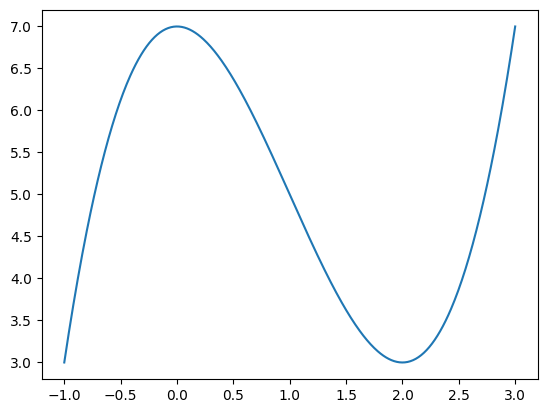

In [5]:
# Create 1000 evenly spaced numbers
x = np.linspace(-1,3,500)

# Plot the curve
plt.plot(x, function(x))
None

<u>The specific derivative function</u>

In [10]:
def deriv(x):
    """
    This function takes in a value of x and returns its derivate based on the function defined above.
    """

    x_deriv = 3 * (x**2) - (6*(x))

    return x_deriv

<u>The step function</u>

As we have seen before, the gradient of a function can be interpreted as a hiker's most direct way to the top of a mountain. If you reverse that, it is also the optimal way down to the valley floor. In the derivative function above, we obtained the gradient or the optimal way down from where the hiker stands **right now** (technically you use the negative gradient, as you want to go down, not up).  Now, we have to decide for how long we want to follow that direction before looking at the hiking map again (e.g. recalculating the gradient) to adjust the direction we are walking in. Remember, if the hiker changes his position, so does the optimal way down the mountain and thus the gradient.

In order to do this, we have to define two things:
- how large of a *step* we should take before recalibrating the direction, called the *learning rate*
- formulate a *condition*, if we should stop walking (e.g. check, if we arrived at the desired destination). Don't pay attention to the specific condition used here, as it is not a relevant method in deep learning. Generally in neural networks, the iterative process is stopped after taking a pre-defined number of steps.
-----
*Remark: Don't worry if you don't fully understand the code below. The important thing is that you get a sense of the concept and understand the individual steps of the algorithm.*

In [11]:
def step(x_new, precision, l_r):

    '''
    Description: This function takes in an initial or previous value for x, updates it based on
    steps taken via the learning rate and outputs the most minimum value of x that reaches the precision satisfaction.

    Arguments:

    x_new - a starting value of x that will get updated based on the learning rate

    x_prev - the previous value of x that is getting updated to the new one

    precision - a precision that determines the stop of the stepwise descent

    l_r - the learning rate (size of each descent step)

    Output:

    1. Prints out the latest new value of x which equates to the minimum we are looking for
    2. Prints out the the number of x values which equates to the number of gradient descent steps
    3. Plots a first graph of the function with the gradient descent path
    4. Plots a second graph of the function with a zoomed in gradient descent path in the important area

    '''

    # create empty lists where the updated values of x and y wil be appended during each iteration

    x_list, y_list = [x_new], [function(x_new)]
    # keep looping until your desired precision
    diffIsTooHigh = True
    while diffIsTooHigh:

        # change the value of x
        x_prev = x_new

        # get the derivation of the old value of x
        d_x = - deriv(x_prev)

        # get your new value of x by adding the previous, the multiplication of the derivative and the learning rate
        x_new = x_prev + (l_r * d_x)

        # append the new value of x to a list of all x-s for later visualization of path
        x_list.append(x_new)

        # append the new value of y to a list of all y-s for later visualization of path
        y_list.append(function(x_new))

        # test condition
        diffIsTooHigh = abs(x_new - x_prev) > precision

    print ("Local minimum occurs at: " + str(x_new))
    print ("Number of steps: " + str(len(x_list)))

    plt.subplots(1,2,figsize=(25,10))

    plt.subplot(1,2,1)
    plt.scatter(x_list,y_list,c="g")
    plt.plot(x_list,y_list,c="g")
    plt.plot(x,function(x), c="r")
    plt.title("Gradient descent")

    plt.subplot(1,2,2)
    plt.scatter(x_list,y_list,c="g")
    plt.plot(x_list,y_list,c="g")
    plt.plot(x,function(x), c="r")
    plt.xlim([1.0,2.1])
    plt.title("Zoomed in Gradient descent to Key Area")
    plt.show()

<u>Implementing Gradient Descent</u>

Local minimum occurs at: 2.762792798369869e-06
Number of steps: 265


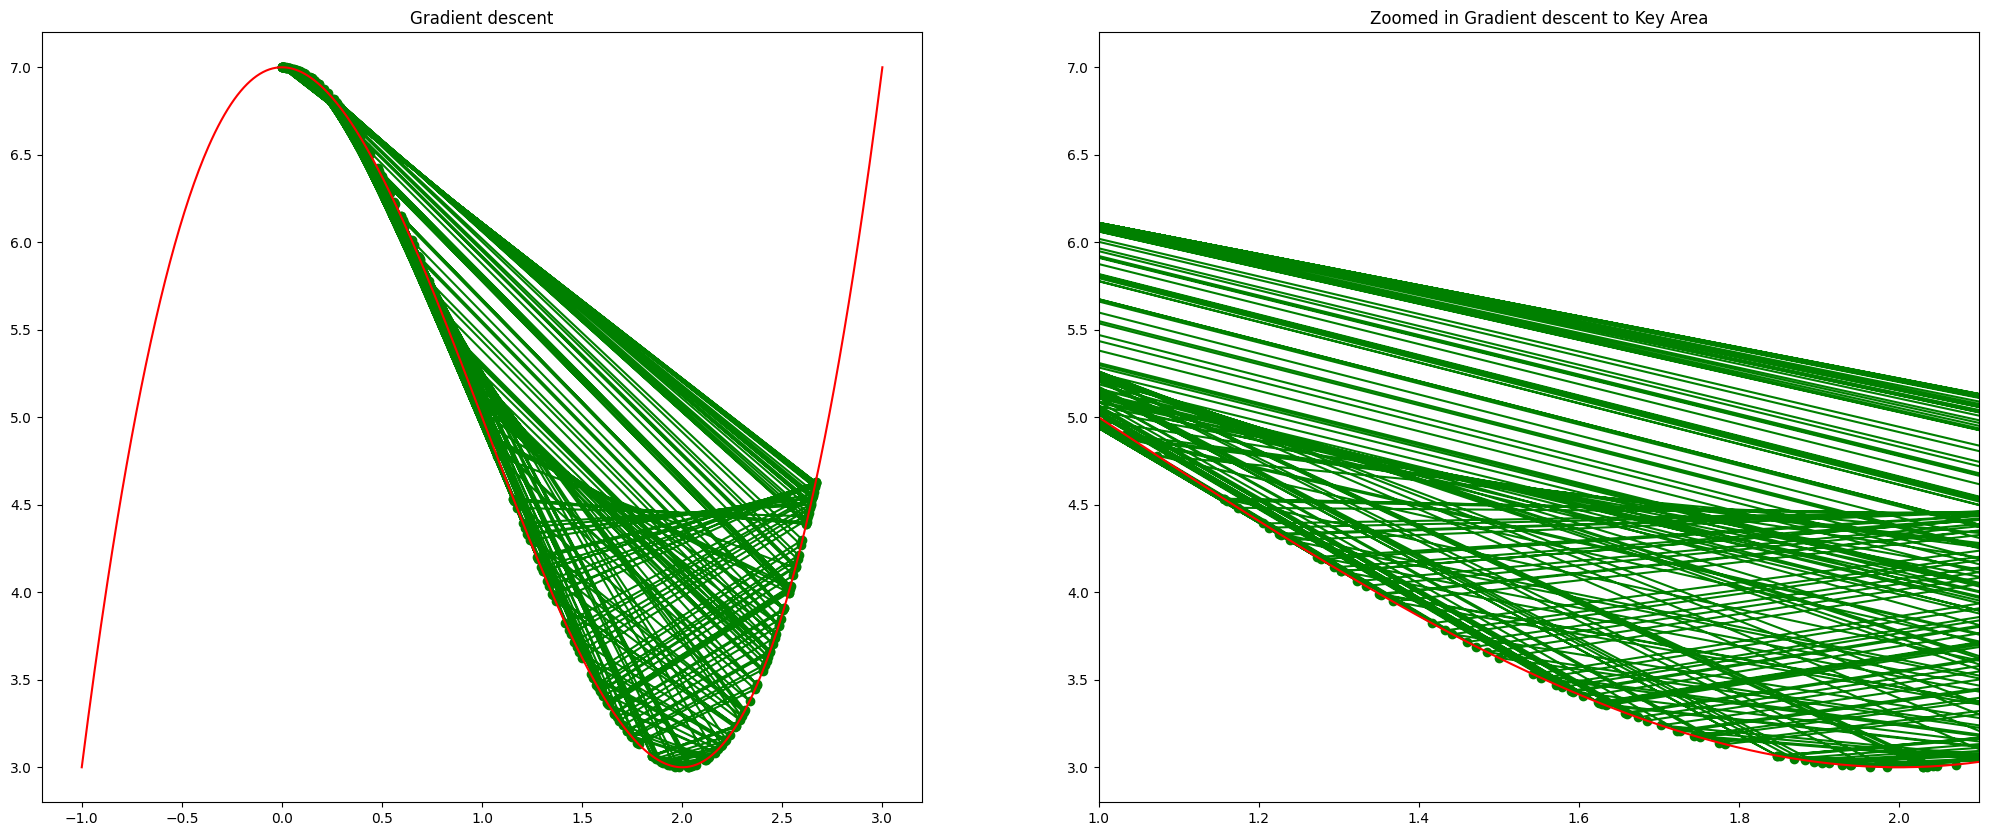

In [20]:
step(0.5, 0.001, 0.5)

**Exercise: The Learning Rate**

Adjust the learning rate (the last parameter of the function, right now 0.05) in the cell above and rerun the algorithm. What happens when you increase the learning rate? If you decrease it?

Write down your observations in the cell below.
smaller number:
	•	The green dots will be closer together.
	•	It will take more steps to reach the bottom.
	•	But it’s very safe — we won’t jump over the minimum.

bigger number:
	•	The green dots might be very far apart.
	•	We might see it jumping over the low point again and again.
	•	Sometimes it never finds the bottom — it just keeps bouncing.


### 4. The Jacobian Matrix

When we move from derivatives of one function to derivatives of many functions, we move from the world of vector calculus to matrix calculus.

Gradient vectors organize all of the partial derivatives for a specific scalar function. If we have two functions, we can also organize their gradients into a matrix by stacking the gradients.
$$
f(x, y)=3 x^{2} y \\
g(x, y)=2 x+y^{8}
$$

When we do so, we get the Jacobian matrix (or just the Jacobian) where the gradients are rows:

$$
J=\left[ \begin{array}{c}{\nabla f(x, y)} \\ {\nabla g(x, y)}\end{array}\right]=\left[ \begin{array}{ll}{\frac{\partial f(x, y)}{\partial x}} & {\frac{\partial f(x, y)}{\partial y}} \\ {\frac{\partial g(x, y)}{\partial x}} & {\frac{\partial g(x, y)}{\partial y}}\end{array}\right]=\left[ \begin{array}{cc}{6 y x} & {3 x^{2}} \\ {2} & {8 y^{7}}\end{array}\right]
$$

So far, we've looked at a specific example of a Jacobian matrix. To define the Jacobian matrix more generally, let's combine multiple parameters into a single vector argument: $f(x, y, z) \Rightarrow f(\mathbf{x})$.  

Lowercase letters in bold font such as $\mathbf{x}$ are vectors and those in italics font like $x$ are scalars. $x_{i}$ is the $i^{th}$ element of vector $x$ and is in italics because a single vector element is a scalar.

We also have to define an orientation for vector $\mathbf{x}$. We'll assume that all vectors are vertical by default of size $n\times1$:

$$
\mathbf{x}=\left[ \begin{array}{c}{x_{1}} \\ {x_{2}} \\ {\vdots} \\ {x_{n}}\end{array}\right]
$$  

With multiple scalar-valued functions, we can combine them all into a vector just like we did with the parameters. Let $y = f(x)$ be a vector of $m$ scalar-valued functions that each take a vector $\mathbf{x}$ of length $n=|\mathbf{x}|$  where $\mathbf{x}$ is the cardinality (count) of elements in $x$. Each $f_{i}$ function within $\mathbf{f}$ returns a scalar.

For instance, we'd represent $f(x,y) = 3x^{2}$ and $g(x,y) = 2x + y^{8}$ like shown below, substituting $x_{1}$ for $x$ and $x_{2}$ for $y$:

$$
\begin{array}{l}{y_{1}=f_{1}(\mathbf{x})=3 x_{1}^{2} x_{2}} \\ {y_{2}=f_{2}(\mathbf{x})=2 x_{1}+x_{2}^{8}}\end{array}
$$

Generally speaking, the Jacobian matrix is the collection of all $m\times{n}$ possible partial derivatives ($m$ rows and $n$ columns), which is the stack of $m$ gradients with respect to $\mathbf{x}$:  

$$
\frac{\partial \mathbf{y}}{\partial \mathbf{x}}=\left[ \begin{array}{c}{\nabla f_{1}(\mathbf{x})} \\ {\nabla f_{2}(\mathbf{x})} \\ {\cdots} \\ {\nabla f_{m}(\mathbf{x})}\end{array}\right]=\left[ \begin{array}{c}{\frac{\partial}{\partial \mathbf{x}} f_{1}(\mathbf{x})} \\ {\frac{\partial}{\partial \mathbf{x}} f_{2}(\mathbf{x})} \\ {\cdots} \\ {\frac{\partial}{\partial \mathbf{x}} f_{m}(\mathbf{x})}\end{array}\right]=\left[ \begin{array}{c}{\frac{\partial}{\partial x_{1}} f_{1}(\mathbf{x}) \frac{\partial}{\partial x_{2}} f_{1}(\mathbf{x}) \ldots \frac{\partial}{\partial x_{n}} f_{1}(\mathbf{x})} \\ {\frac{\partial}{\partial x_{1}} f_{2}(\mathbf{x}) \frac{\partial}{\partial x_{2}} f_{2}(\mathbf{x}) \ldots . \frac{\partial}{\partial x_{n}} f_{2}(\mathbf{x})} \\ {\ldots} \\ {\frac{\partial}{\partial x_{1}} f_{m}(\mathbf{x}) \frac{\partial}{\partial x_{2}} f_{m}(\mathbf{x}) \ldots \frac{\partial}{\partial x_{n}} f_{m}(\mathbf{x})}\end{array}\right]
$$

  
Another explanation of the Jacobian can be found here: https://www.youtube.com/watch?v=wCZ1VEmVjVo

### 5. The Chain Rules

We can't compute partial derivatives of very complicated functions using just the basic matrix calculus rules we've seen so far. For example, we can't take the derivative of nested expressions like  directly without reducing it to its scalar equivalent. We need to be able to combine our basic vector rules using what we can call the vector chain rule.

#### 5.1. Single-Variable Chain Rule

The chain rule is conceptually a divide and conquer strategy (like Quicksort) that breaks complicated expressions into subexpressions whose derivatives are easier to compute. Its power derives from the fact that we can process each simple subexpression in isolation yet still combine the intermediate results to get the correct overall result.

**Function to derive:**

$$
f(g(x))
$$

**Formula:**

$$
\frac{d y}{d x}=\frac{d y}{d u} \frac{d u}{d x}\;with\;u=g(x)
$$

**Steps:**
1. Introduce intermediate variables for subexpressions.
2. Compute derivatives.
3. Combine all derivatives of intermediate variables by multiplying them together.
4. Substitute intermediate variables back in.

For a review of the single-variable chain rule and some interactive exercises, visit this site: https://bit.ly/2vKmhbq

#### 5.2. Single-Variable Total Derivative Chain Rule

Our single-variable chain rule has limited applicability because all intermediate variables must be functions of single variables. To handle more general expressions such as $y=f(x)=x+x^{2}$, however, we need to augment that basic chain rule.

If we tried to apply the single-variable chain rule, we'd get the wrong answer. In fact, the previous chain rule is meaningless in this case because derivative operator $\frac{d}{d x}$ does not apply to multivariate functions, such as $u_{2}$ among our intermediate variables:

$$
\begin{array}{l}{u_{1}(x)=x^{2}} \\ {u_{2}\left(x, u_{1}\right)=x+u_{1} \quad \quad\left(y=f(x)=u_{2}\left(x, u_{1}\right)\right)}\end{array}
$$

Because $u_{2}(x, u)=x+u_{1}$ has multiple parameters, partial derivatives come into play. Let's blindly apply the partial derivative operator to all of our equations and see what we get:

$$
\begin{aligned} \frac{\partial u_{1}(x)}{\partial x} &=2 x \\ \frac{\partial u_{2}\left(x, u_{1}\right)}{\partial u_{1}} &=\frac{\partial}{\partial u_{1}}\left(x+u_{1}\right)=0+1=1 \\ \frac{\partial u_{2}\left(x, u_{1}\right)}{\partial x} & = \frac{\partial}{\partial x}\left(x+u_{1}\right)=1+0=1 \end{aligned}
$$

The partial $\frac{\partial u_{2}\left(x, u_{1}\right)}{\partial x}$ is wrong because it violates a key assumption for partial derivatives. When taking the partial derivative with respect to $x$, the other variables must not vary as $x$ varies. Otherwise, we could not act as if the other variables were constants.

If we apply the chaine rule from above we would get $2x$ instead of the right answer $1+2x$:

$$
\frac{d u_{2}}{d u_{1}}=0+1=1
$$

$$
\frac{d u_{1}}{d x}=2 x
$$

$$
\frac{d y}{d x}=\frac{d u_{2}}{d x}=\frac{d u_{2}}{d u_{1}} \frac{d u_{1}}{d x}=2 x
$$

This problem can be solved with the "law" of total derivatives, which basically says that to compute $\frac{d y}{d x}$, we need to sum up all possible contributions from changes in $x$ to the change in $y$:

$$
\frac{\partial f\left(u_{1}, \ldots, u_{n+1}\right)}{\partial x}=\sum_{i=1}^{n+1} \frac{\partial f}{\partial u_{i}} \frac{\partial u_{i}}{\partial x}
$$

Using this formula, we get the proper answer:

$$
\frac{d y}{d x}=\frac{\partial f(x)}{\partial x}=\frac{\partial u_{2}}{\partial x}+\frac{\partial u_{2}}{\partial u_{1}} \frac{\partial u_{1}}{\partial x}=1+1 \times 2 x=1+2 x
$$

The total derivative assumes all variables are potentially codependent whereas the partial derivative assumes all variables but x are constants. In practice, just keep in mind that when you take the total derivative with respect to x, other variables might also be functions of x so add in their contributions as well.

#### 5.3. Vector Chain Rule

<u>Using Scalar Operations</u>  

$$
Sample\:vector\:function: \;\;\mathbf{y}=\mathbf{f}(x):\;\;\;\left[ \begin{array}{l}{y_{1}(x)} \\ {y_{2}(x)}\end{array}\right]=\left[ \begin{array}{l}{f_{1}(x)} \\ {f_{2}(x)}\end{array}\right]=\left[ \begin{array}{c}{\ln \left(x^{2}\right)} \\ {\sin (3 x)}\end{array}\right]
$$

$$
Introducing\:intermediate\:variables: \;\;\mathbf{y}=\mathbf{f}(\mathbf{g}(x)):\;\;\;\left[ \begin{array}{l}{g_{1}(x)} \\ {g_{2}(x)}\end{array}\right]=\left[ \begin{array}{l}{x^{2}} \\ {3 x}\end{array}\right]\;\;\;and\;\;\;\left[ \begin{array}{l}{f_{1}(\mathbf{g})} \\ {f_{2}(\mathbf{g})}\end{array}\right]=\left[ \begin{array}{l}{\ln \left(g_{1}\right)} \\ {\sin \left(g_{2}\right)}\end{array}\right]
$$

The derivative of vector $\mathbf{y}$ with respect to scalar $x$ is a vertical vector with elements computed using the single-variable total-derivative chain rule:

$$
The\:derivative: \;\;\frac{\partial \mathbf{y}}{\partial x}=\left[ \begin{array}{l}{\frac{\partial f_{1}(\mathbf{g})}{\partial x}} \\ {\frac{\partial f_{2}}{\partial x}}\end{array}\right]=\left[ \begin{array}{c}{\frac{\partial f_{1}}{\partial g_{1}} \frac{\partial g_{1}}{\partial x}+\frac{\partial f_{1}}{\partial g_{2}} \frac{\partial g_{2}}{\partial x}} \\ {\frac{\partial f_{2}}{\partial g_{1}} \frac{\partial g_{1}}{\partial x}+\frac{\partial f_{2}}{\partial g_{2}} \frac{\partial g_{2}}{\partial x}}\end{array}\right]=\left[ \begin{array}{c}{\frac{1}{g_{1}} 2 x+0} \\ {0+\cos \left(g_{2}\right) 3}\end{array}\right]=\left[ \begin{array}{c}{\frac{2 x}{x^{2}}} \\ {3 \cos (3 x)}\end{array}\right]=\left[ \begin{array}{c}{\frac{2}{x}} \\ {3 \cos (3 x)}\end{array}\right]
$$

<u>Using Vector Operations</u>

The goal is to convert the following vector of scalar operations to a vector operation:

$$
\left[ \begin{array}{l}{\frac{\partial f_{1}}{\partial g_{1}} \frac{\partial g_{1}}{\partial x}+\frac{\partial f_{1}}{\partial g_{2}} \frac{\partial g_{2}}{\partial x}} \\ {\frac{\partial f_{2}}{\partial g_{1}} \frac{\partial g_{1}}{\partial x}+\frac{\partial f_{2}}{\partial g_{2}} \frac{\partial g_{2}}{\partial x}}\end{array}\right]
$$

If we split the $\frac{\partial f_{i}}{\partial g_{j}} \frac{\partial g_{j}}{\partial x}$ terms, isolating the $\frac{\partial g_{j}}{\partial x}$ terms into a vector, we get a matrix by vector multiplication:

$$
\left[ \begin{array}{ll}{\frac{\partial f_{1}}{\partial g_{1}}} & {\frac{\partial f_{1}}{\partial g_{2}}} \\ {\frac{\partial f_{2}}{\partial g_{1}}} & {\frac{\partial f_{2}}{\partial g_{2}}}\end{array}\right] \left[ \begin{array}{l}{\frac{\partial g_{1}}{\partial x}} \\ {\frac{\partial g_{2}}{\partial x}}\end{array}\right]=\frac{\partial \mathrm{f}}{\partial \mathrm{g}} \frac{\partial \mathrm{g}}{\partial x}
$$

That means that the Jacobian is the multiplication of two other Jacobians. Let's apply this to our example:

$$
\frac{\partial \mathrm{f}}{\partial \mathrm{g}} \frac{\partial \mathrm{g}}{\partial x}=\left[ \begin{array}{cc}{\frac{1}{g_{1}}} & {0} \\ {0} & {\cos \left(g_{2}\right)}\end{array}\right] \left[ \begin{array}{c}{2 x} \\ {3}\end{array}\right]=\left[ \begin{array}{c}{\frac{1}{g_{1}} 2 x+0} \\ {0+\cos \left(g_{2}\right) 3}\end{array}\right]=\left[ \begin{array}{c}{\frac{2}{x}} \\ {3 \cos (3 x)}\end{array}\right]
$$

Thus, the vector chain rule for vectors of functions and a single parameters is:

$$
\frac{\partial}{\partial x} \mathbf{f}(\mathbf{g}(x))=\frac{\partial \mathbf{f}}{\partial \mathbf{g}} \frac{\partial \mathbf{g}}{\partial x}
$$

To make this formula work for multiple parameters or vector $\mathbf{x}$, we just have to change $x$ to vector $\mathbf{x}$ in the equation. The effect is that $\frac{\partial g}{\partial x}$ and the resulting Jacobian, $\frac{\partial \mathbf{f}}{\partial \mathbf{x}}$, are now matrices instead of vertical vectors:

$$
\frac{\partial}{\partial \mathbf{x}} \mathbf{f}(\mathbf{g}(\mathbf{x}))=\frac{\partial \mathbf{f}}{\partial \mathbf{g}} \frac{\partial \mathbf{g}}{\partial \mathbf{x}} = \left[ \begin{array}{cccc}{\frac{\partial f_{1}}{\partial g_{1}}} & {\frac{\partial f_{1}}{\partial g_{2}}} & {\dots} & {\frac{\partial f_{1}}{\partial g_{k}}} \\ {\frac{\partial f_{2}}{\partial g_{1}}} & {\frac{\partial f_{2}}{\partial g_{2}}} & {\dots} & {\frac{\partial f_{2}}{\partial g_{k}}} \\ {\frac{\partial f_{m}}{\partial g_{1}}} & {\frac{\partial f_{m}}{\partial g_{2}}} & {\dots} & {\frac{\partial f_{m}}{\partial g_{k}}}\end{array}\right]\left[ \begin{array}{cccc}{\frac{\partial g_{1}}{\partial x_{1}}} & {\frac{\partial g_{1}}{\partial x_{2}}} & {\dots} & {\frac{\partial g_{1}}{\partial x_{n}}} \\ {\frac{\partial g_{2}}{\partial x_{1}}} & {\frac{\partial g_{2}}{\partial x_{2}}} & {\dots} & {\frac{\partial g_{2}}{\partial x_{n}}} \\ {\frac{\partial g_{k}}{\partial x_{1}}} & {\frac{\partial g_{k}}{\partial x_{2}}} & {\dots} & {\frac{\partial g_{k}}{\partial x_{n}}}\end{array}\right]
$$



Another way of understanding the chain rule is through computational graphs. Watch this video: https://www.youtube.com/watch?v=mAylIRXHAi4
And read this article: https://rishisharma.netlify.app/post/differentiation-dag/

### Wrap-Up

In this notebook, we learned the underpinning calculus concepts needed to understand and apply machine and deep learning concepts. We gave a brief introduction of activation functions and explained the gradient descent algorithm and its most important hyperparameters. Furthermore, we introduced matrix calculus which is crucial to understand neural networks and machine learning algorithms like gradient boosting, which you will get to know in the program.  

In the last pre-work notebook we will look at the make-up of a neural network. Head over there for the last part of this series of notebooks and dive in the world of deep learning!